### Tugas 2 Brilyan

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Download MNIST Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Reshape data, add channel dimension and normalize to range 0-1 

In [3]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)) / 255.0

Data verification 

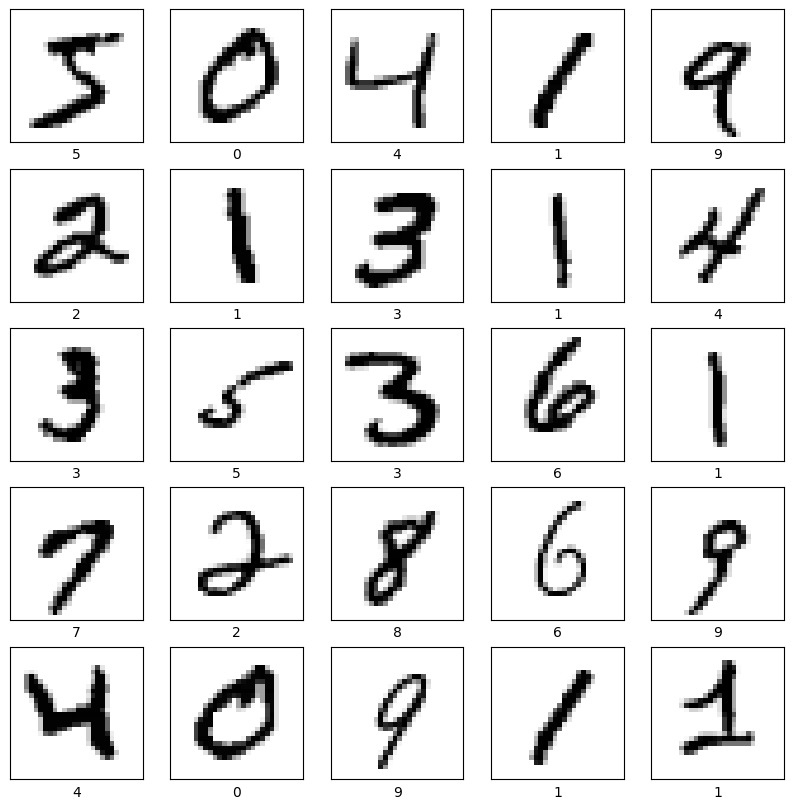

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

Build CNN model

In [6]:
# Define the CNN model
model = models.Sequential()

# Convolutional and Pooling Layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

c:\Users\hp\.conda\envs\tensorflow\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile and train

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.8963 - loss: 0.3343 - val_accuracy: 0.9875 - val_loss: 0.0374
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9846 - loss: 0.0507 - val_accuracy: 0.9893 - val_loss: 0.0321
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9895 - loss: 0.0336 - val_accuracy: 0.9864 - val_loss: 0.0423
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9923 - loss: 0.0234 - val_accuracy: 0.9880 - val_loss: 0.0345
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9938 - loss: 0.0194 - val_accuracy: 0.9911 - val_loss: 0.0305
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9961 - loss: 0.0129 - val_accuracy: 0.9917 - val_loss: 0.0288
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9966 - loss: 0.0102 - val_accuracy: 0.9916 - val_loss: 0.0319
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.9964 -

Evaluation

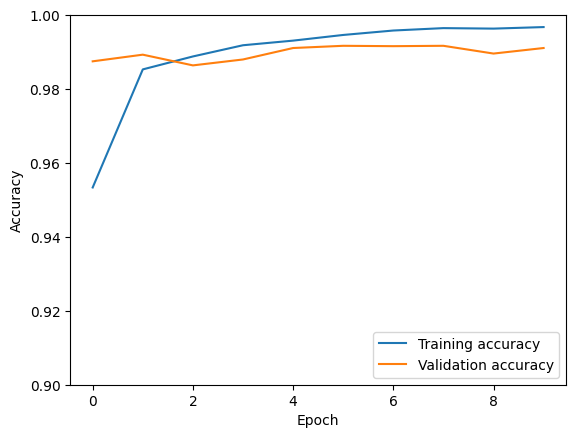

In [8]:

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.show()

In [13]:
print('Last Validation Accuracy: %.2f' % history.history['val_accuracy'][-1])

Last Validation Accuracy: 0.99
